### Lab for Week 7: Softmax Regression and KNN (Non-parametric classifier)

This week, we are going to explore the general version of logistic regression for multiple classes, i.e., the Softmax regression. Note that training a softmax regression with scipy is just 3-4 lines of code; the function is the same as that of Logistic Regression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with the `num_classes` parameter set to higher than 2. However, here we'd aim to develop this code from the first principles (as we have seen during the lectures). We will then also explore a non-parametric approach, which won't require us to compute and implement the gradient computation functions (as we did for Logistic and Softmax).

So, the aims are:

- #### Aims:
    - Revise Week 7 lecture notes
    - Understand/Implement a Softmax classifier
    - Understand/Implement a KNN classifier
    

### Task 1:  Implement a Softmax classifier

From the lecture notes, we know that for softmax of $K$ classes, we first need to define the hypothesis function as

$$ P(y=k|\mathbf{x}) = \hat{y}_k(\mathbf{x}) = \frac{\exp(\theta_k\cdot\mathbf{x})}{\sum_{j=1}^K \exp(\theta_j\cdot\mathbf{x})}$$

This basically means that the posterior is a distribution of probability values over each class, each probability being modeled by an exponent ($\exp(z)$) over the linear activation ($z=\theta_k \mathbf{x}$).

From your lecture notes, see that we had defined the multinomial likelihood as
$$ L(\Theta, \mathbf{x}) = \prod_{k=1}^K (\theta_k\cdot \mathbf{x})^{y_k}$$

Realise that $\mathbf{y} \in \{0,1\}^K$ is a one-hot vector, and $\mathbf{\hat{y}} \in \mathbb{R}^K$ is a probability distribution ($\sum_k y_k = 1$) 

**TASK 1.1**: Express the softmax likelihood as a negative log likelihood (just as we did for logistic regression last week).



From your lecture notes, recall that the partial derivative of the softmax with respect to the $j^{th}$ component of a single data instance $\mathbf{x}$ was computed to be:
$$ \frac{\partial L(\mathbf{x},\theta_1,\ldots,\theta_K)}{\partial {\theta_k}_j} = (\hat{y}_k - y_k)x_j.$$
This is everything that you need to implement the algorithm for stochastic gradient descent.

**TASK 1.2**: Similar to what we did for logistic regression last week, you will now have to insert your own implementation in the following partially implemented code for softmax regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Softmax regression class (from before) ---
class MySoftmaxRegression:
    def __init__(self, n_iters=2000, lr=0.1):
        self.n_iters = n_iters
        self.lr = lr
        self.W = None
        self.b = None
        self.losses = []

    def _softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        return -np.mean(np.sum(y_true * np.log(y_pred + epsilon), axis=1))

    def feed_forward(self, X):
        Z = np.dot(X, self.W) + self.b
        return self._softmax(Z)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        classes = np.unique(y)
        n_classes = len(classes)

        # One-hot encode y
        y_onehot = np.zeros((n_samples, n_classes))
        y_onehot[np.arange(n_samples), y] = 1

        # Initialize parameters
        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros(n_classes)

        # Gradient descent
        # Insert code here
        #...
        for i in range(self.n_iters):
            A = self.feed_forward(X)
            loss = self.compute_loss(y_onehot, A)
            self.losses.append(loss)

            dZ = A - y_onehot
            dW = (1.0 / n_samples) * np.dot(X.T, dZ)
            db = (1.0 / n_samples) * np.sum(dZ, axis=0)

            self.W -= self.lr * dW
            self.b -= self.lr * db

            # Optionally print loss
            if i % 200 == 0:
                print(f"Iteration {i}, loss = {loss:.4f}")

    def predict_prob(self, X):
        return self.feed_forward(X)

    def predict(self, X):
        #Insert code here
        #...
        A = self.feed_forward(X)
        return np.argmax(A, axis=1)

We now i) generate synthetic data (of 3 classes), ii) call our classifier, and iii) see how our classifier performs by plotting a decision region (**not a single boundary anymore**). 

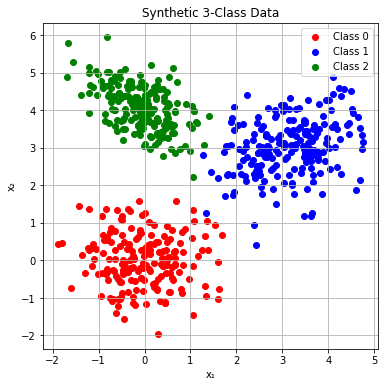

In [2]:
# --- Generate synthetic 2D data with 3 classes ---
np.random.seed(0)

n = 200  # points per Gaussian

# Class 0
mean0 = np.array([0, 0])
cov0 = np.array([[0.5, 0], [0, 0.5]])
X0 = np.random.multivariate_normal(mean0, cov0, n)

# Class 1
mean1 = np.array([3, 3])
cov1 = np.array([[0.6, 0.2], [0.2, 0.6]])
X1 = np.random.multivariate_normal(mean1, cov1, n)

# Class 2
mean2 = np.array([0, 4])
cov2 = np.array([[0.4, -0.2], [-0.2, 0.4]])
X2 = np.random.multivariate_normal(mean2, cov2, n)

# Combine
X = np.vstack([X0, X1, X2])
y = np.array([0]*n + [1]*n + [2]*n)

# Plot data
plt.figure(figsize=(6,6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='Class 1')
plt.scatter(X[y==2, 0], X[y==2, 1], c='green', label='Class 2')
plt.legend()
plt.title("Synthetic 3-Class Data")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.show()



Iteration 0, loss = 1.0986
Iteration 200, loss = 0.1233
Iteration 400, loss = 0.0783
Iteration 600, loss = 0.0610
Iteration 800, loss = 0.0516
Iteration 1000, loss = 0.0455
Iteration 1200, loss = 0.0412
Iteration 1400, loss = 0.0380
Iteration 1600, loss = 0.0355
Iteration 1800, loss = 0.0335


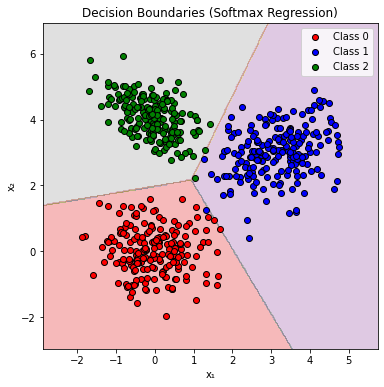

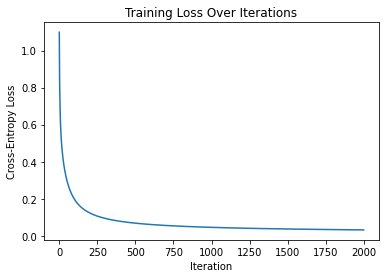

In [5]:
# --- Train softmax regression ---
model = MySoftmaxRegression(n_iters=2000, lr=0.1)
model.fit(X, y)

# --- Plot decision boundaries ---
# Create a grid over the feature space
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict class for each point on the grid
probs = model.predict_prob(grid)
preds = np.argmax(probs, axis=1)
Z = preds.reshape(xx.shape)

# Plot
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', edgecolor='k', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', edgecolor='k', label='Class 1')
plt.scatter(X[y==2, 0], X[y==2, 1], c='green', edgecolor='k', label='Class 2')
plt.legend()
plt.title("Decision Boundaries (Softmax Regression)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.show()

# --- Optional: Plot loss curve ---
plt.figure()
plt.plot(model.losses)
plt.title("Training Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cross-Entropy Loss")
plt.show()

Now, similar to last week, we will introduce a temperature parameter in the softmax (just as we did in the logistic). More precisely, the hypothesis function $h(\theta_k)$ now changes from $\exp(\theta_k\cdot\mathbf{x})$ to $\exp(\alpha \theta_k\cdot\mathbf{x})$, where $\alpha \in \mathbb{R}$ is a scalar hyper-parameter.

**TASK 1.3**: Write down the modified stochastic gradient algorithm for this **generalised softmax with the temperature parameter** $\alpha$. Note that unlike last week you **don't need to derive this from scratch** (just generalize this similar to what we did for logistic regression).     

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# --- Softmax regression class (from before) ---
class MySoftmaxRegressionWithTemp:
    def __init__(self, n_iters=2000, lr=0.1, temp=0.1):
        self.n_iters = n_iters
        self.lr = lr
        self.temp = temp
        self.W = None
        self.b = None
        self.losses = []

    def _softmax(self, Z):
        expZ = np.exp(self.temp * Z - np.max(Z, axis=1, keepdims=True))
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        return -np.mean(np.sum(y_true * np.log(y_pred + epsilon), axis=1))

    def feed_forward(self, X):
        Z = np.dot(X, self.W) + self.b
        return self._softmax(Z)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        classes = np.unique(y)
        n_classes = len(classes)

        # One-hot encode y
        y_onehot = np.zeros((n_samples, n_classes))
        y_onehot[np.arange(n_samples), y] = 1

        # Initialize parameters
        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros(n_classes)

        # Gradient descent
        # Insert code here
        #...
        for i in range(self.n_iters):
            A = self.feed_forward(X)
            loss = self.compute_loss(y_onehot, A)
            self.losses.append(loss)

            dZ = A - y_onehot
            dW = (self.temp / n_samples) * np.dot(X.T, dZ)
            db = (self.temp / n_samples) * np.sum(dZ, axis=0)

            self.W -= self.lr * self.temp * dW
            self.b -= self.lr * self.temp * db

            # Optionally print loss
            if i % 200 == 0:
                print(f"Iteration {i}, loss = {loss:.4f}")

    def predict_prob(self, X):
        return self.feed_forward(X)

    def predict(self, X):
        #Insert code here
        #...
        A = self.feed_forward(X)
        return np.argmax(A, axis=1)

**TASK 1.4**: What's the effect of varying this temperature parameter on the decision boundary (say $\alpha \in \{0.01, 0.1, 1, 10, 100\}$)? Explain briefly your observation.

Iteration 0, loss = 1.0986
Iteration 200, loss = 0.0029
Iteration 400, loss = 0.0020
Iteration 600, loss = 0.0017
Iteration 800, loss = 0.0015
Iteration 1000, loss = 0.0015
Iteration 1200, loss = 0.0015
Iteration 1400, loss = 0.0014
Iteration 1600, loss = 0.0014
Iteration 1800, loss = 0.0014


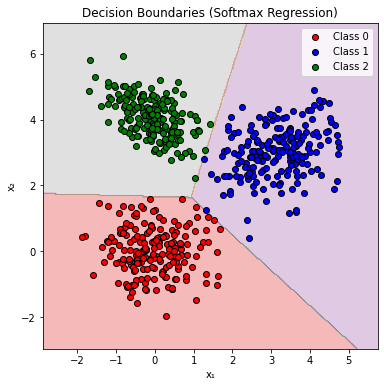

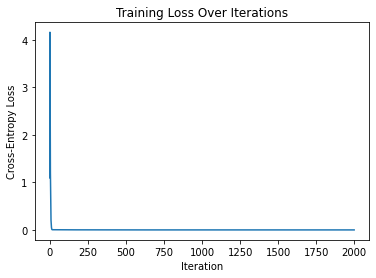

In [17]:
# --- Train softmax regression ---
model = MySoftmaxRegressionWithTemp(n_iters=2000, lr=0.1, temp=10)
model.fit(X, y)

# --- Plot decision boundaries ---
# Create a grid over the feature space
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict class for each point on the grid
probs = model.predict_prob(grid)
preds = np.argmax(probs, axis=1)
Z = preds.reshape(xx.shape)

# Plot
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', edgecolor='k', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', edgecolor='k', label='Class 1')
plt.scatter(X[y==2, 0], X[y==2, 1], c='green', edgecolor='k', label='Class 2')
plt.legend()
plt.title("Decision Boundaries (Softmax Regression)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.show()

# --- Optional: Plot loss curve ---
plt.figure()
plt.plot(model.losses)
plt.title("Training Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cross-Entropy Loss")
plt.show()

### Task 2:  Implement a KNN classifier


##### Task 2.1: Load classification data
We are now using the `trainx.csv` and `testx.csv` from the **last week's lab**. In trainx.csv, each row corresponds to an instance. The first two columns are the values for two features and the third is the class label. The same format is used in `testx.csv`. Load these datasets into python (numpy.loadtxt) and create an X matrix consisting of the first two columns and a t vector as the last one. Do the same for the test data so you have four objects: $\mathbf{X}$, $\mathbf{X}_{test}$, $\mathbf{y}$ and $\mathbf{y}_{test}$.

In [19]:
traindata = np.loadtxt('trainx.csv',delimiter=',')
testdata = np.loadtxt('testx.csv',delimiter=',')
trainX = traindata[:,:2] # X, training data 
trainY = traindata[:,2]  # y, training label
testX = testdata[:,:2]   # X_test, 
testY = testdata[:,2]    # Y_test

Plot the training data

Text(0, 0.5, 'Feature 2')

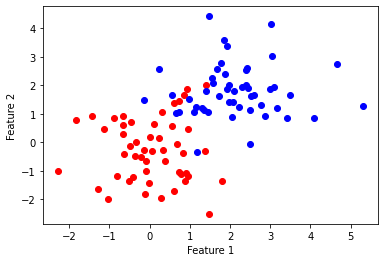

In [20]:
plt.plot(trainX[:50,0],trainX[:50,1],'ro') 
plt.plot(trainX[50:,0],trainX[50:,1],'bo')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

##### TASK 2.1: Write a KNN function for a single test example (a row)
Implement a KNN function that takes a single test example and a value of K and returns a classification. Your function should find the K closest (see below) training points to the test point and return the majority class
amongst these training points.

If your training data is in a numpy array with 100 rows and 2 columns, then the distance between a test point and the ith row is given by:

`sq_diff = (test_row - trainx[i,:])**2
dist = np.sqrt(sq_diff.sum())`

where test_row is a row of $\mathbf{X}_{test}$.
The first line creates a new vector which holds the squared difference of the two pairs of values. The second line takes the sum of these differences and then takes the square root. This is computing the Euclidean distance. Other distance metrics could also be used.

The `zip`, `sorted` and `numpy`'s `unique` can be helpful for finding the nearest neighbours.

Make sure your function returns both the predicted class and predicted score. For KNN, the score can be the percentage of votes for each class. 

In [22]:
def knn_classifier(trainX, trainY, test_data, K=3):
    distances = np.sqrt(((trainX - test_data)**2).sum(axis=1)) # computing distances from the testing data to all training data
    
    #INSERT CODE HERE
    #...
    dc = zip(distances, trainY) 
    dc = sorted(dc, key = lambda x: x[0]) # sort distance 
    selected_neighbor = np.asarray(dc[:K]) # select K number of neareast neighbours
    classes, counts = np.unique(selected_neighbor[:,1], return_counts=True)
    prediction = {}
    prediction["predicted_class"] = classes[counts.argmax()]
    
    if ( len(classes) == 1 and classes[counts.argmax()] == 1.0):
        prediction["predicted_score"] = np.hstack( (1.0- (1.0*counts/sum(counts)), 1.0*counts/sum(counts) ) )
    elif ( len(classes) == 1 and classes[counts.argmax()] == 0.0):
        prediction["predicted_score"] = np.hstack( ( 1.0*counts/sum(counts), 1.0- (1.0*counts/sum(counts)) ) )
    else:
        prediction["predicted_score"] = 1.0*counts/sum(counts)
        
    return(prediction)

##### Predict on a test point

In [23]:
test_index = 152
c = knn_classifier(trainX,trainY,testX[test_index],K=13)
print (c)

{'predicted_class': 1.0, 'predicted_score': array([0.30769231, 0.69230769])}


##### TASK 2.2: Plot Accuracy vs K 

Test your function with a range of possible `K`, and compare accuracies **on all test data**. Plot the results and explain your observations.

Text(0, 0.5, 'Accuracy')

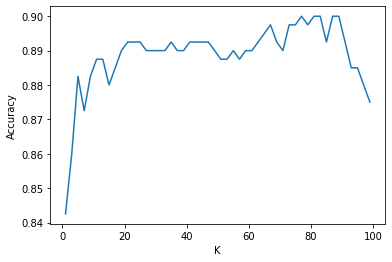

In [24]:
Kvals = np.arange(1,100,2)
accuracy = []
for k in Kvals:
    correct = 0
    for i,row in enumerate(testX):
        c = knn_classifier(trainX,trainY,row,K=k)["predicted_class"]
        if c == testY[i]:
            correct += 1
    accuracy.append(1.0*correct / (1.0*len(testX)))

plt.figure()
plt.plot(Kvals,accuracy)
plt.xlabel("K")
plt.ylabel("Accuracy")